In [1]:
import os
### QAOA_realestate가 있는 폴더로 지정
dir_path = "/Users/minhyeong-gyu/Documents/GitHub/QuantumVariableSelection"
os.chdir(dir_path)
import sys
module_path = dir_path + "/Module"
if module_path not in sys.path:
    sys.path.append(module_path)

from optimizer import optimizer as opt
from optimizer import basefunctions as bf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
# 윈도우 한글 폰트
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# Mac 한글 폰트
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
from dwave.system import LeapHybridCQMSampler
%matplotlib inline

In [2]:
def trim_down(x):
    x= np.asarray(x)
    result = [0.0 if i < 0.0 else i for i in x]
    return result

def trim_up(x):
    x= np.asarray(x)
    result = [1.0 if i > 1.0 else i for i in x]
    return result

def trim(x):
    result = trim_up(trim_down(x))
    return result

In [3]:
from sklearn.utils import check_random_state

In [4]:
# def generate_dependent_sample_logistic(n_samples=500, n_features=10, beta_coef =[4,3,2,2],epsilon=4,covariance_parameter=1, random_state=None):
#     rng = check_random_state(random_state)
#     if n_features < 4:
#         raise ValueError("`n_features` must be >= 4. "
#                             "Got n_features={0}".format(n_features))
#     v = rng.normal(0, 0.4, (n_features, n_features))
#     mean = np.zeros(n_features)
#     cov = v @ v.T*covariance_parameter + 0.1 * np.identity(n_features)
#     X = rng.multivariate_normal(mean, cov, n_samples)
#     n_informative = len(beta_coef)
#     beta = np.hstack((
#         beta_coef, np.zeros(n_features - n_informative)))
#     theta = np.dot(X, beta)
#     theta += -1*np.mean(theta)
#     theta += epsilon * rng.randn(n_samples)
#     prob = (1+np.exp(20*theta/np.max(theta)))**(-1)
#     y = np.array([(np.random.rand()<i)*1.0 for i in prob]).reshape((n_samples,))
#     return X, y

In [5]:
number_influentials =8
number_features = 40
number_samples = 1000
covariance_parameter = 2
beta_coef = np.concatenate([np.random.normal(10,2,number_influentials),np.zeros(number_features-number_influentials)])
epsilon = 0
X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
y_type="binary"

In [6]:
# acc_list = []
# for i in range(1024):
#     col_index = [bool(int(j)) for j in format(i,"#012b")[2:]]
#     acc_list += [bf.get_accuracy(X[:,col_index],y.reshape(-1,),0.8)]

In [7]:
lmbd = 0.01

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Text(0.5, 1.0, 'Partial R2')

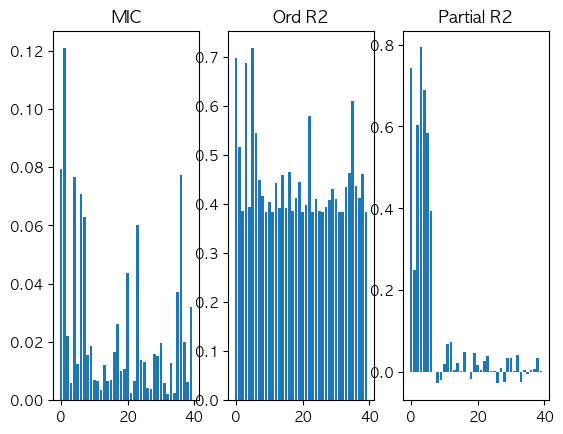

In [10]:
plt.subplot(131)
Q,beta = bf.get_selecting_qubo(X,y,y_type = y_type,measure="mi")
plt.bar(x = range(number_features),height = beta)
plt.title("MIC")
plt.subplot(132)
Q,beta = bf.get_selecting_qubo(X,y,y_type = y_type,measure="full")
plt.bar(x = range(number_features),height = beta)
plt.title("Ord R2")
plt.subplot(133)
Q,beta = bf.get_selecting_qubo(X,y,y_type = y_type,measure="partial")
plt.bar(x = range(number_features),height = beta)
plt.title("Partial R2")

In [9]:
lmbd=0.01

In [65]:
p=40
q=5

theta_temp = np.zeros(p)
theta_temp[np.random.choice(range(p),q)] = 1
theta_temp

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0.])

In [10]:
sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10)

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

KeyboardInterrupt: 

In [ ]:
sa_mi_result

array([1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [ ]:
sa_full_result

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
sa_partial_result

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0.])

In [30]:
from time import gmtime, strftime
strftime("%H:%M:%S", gmtime())

'07:08:42'

In [58]:
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
thetasets = [[1 for i in range(number_features)],sa_mi_result,sa_full_result,sa_partial_result]
AIC_list = []
QUBO_list = []
MSPE_list = []
R2_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    MSPE_list += [bf.get_accuracy(dataset,y,0.9)]
    CN_list += [bf.get_CN(dataset)]

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [59]:
MSPE_list 

[0.95, 0.81, 0.89, 0.96]

In [60]:
CN_list 

[20.45699140755472, 2.0147180810295473, 19.220651196388573, 5.2219413874799026]

In [62]:
number_influentials =8
number_features = 40
number_samples = 1000
covariance_parameter = 100
beta_coef = np.concatenate([np.random.normal(10,2,number_influentials),np.zeros(number_features-number_influentials)])
epsilon = 0
X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
y_type="binary"
true_index = np.array([True for i in range(number_influentials)]+[False for i in range(number_features-number_influentials)])
random_index1 = np.random.randint(2,size=number_features).astype(bool)
random_index2 = np.array([True for i in range(number_influentials)] + np.random.randint(2,size=number_features-number_influentials).astype(bool).tolist())
X_true = X[:,true_index]
X_random1 = X[:,random_index1]
X_random2 = X[:,random_index2]
datasets = [X,X_true,X_random1,X_random2]
Accuracy_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    Accuracy_list += [bf.get_accuracy(dataset,y,0.9)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([Accuracy_list]+[CN_list])
result.index = ["Accuracy","CN"]
result.columns = ["Full","True","Random","True+Random"]
result

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Full,True,Random,True+Random
Accuracy,0.930000,0.890000,0.85000,0.870000
CN,149.202056,2.265347,4.82761,6.626932


In [94]:
result_table = pd.read_csv("result/simulation_measure/result_table.csv")

In [95]:
result_table

,Score,Original,Mutual Information Criterion,Ordinary R2,Partial R2
0,R2,0.94(0.01),0.68(0.06),0.89(0.06),0.94(0.01)
1,R2,0.93(0.02),0.86(0.08),0.71(0.11),0.90(0.05)
2,R2,0.94(0.01),0.94(0.02),0.77(0.011),0.94(0.01)
3,CN,75.22(19.85),2.68(0.57),6.30(1.03),3.35(0.94)
4,CN,78.03(11.38),6.69(1.44),2.96(0.44),1.96(0.22)
5,CN,79.96(19.18),41.66(10.59),4.32(0.91),2.11(019)


In [96]:
plot_df = np.array([
trim_up(np.random.normal(float(result_table.iloc[0,2].strip()[:4]),float(result_table.iloc[0,2].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[1,2].strip()[:4]),float(result_table.iloc[1,2].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[2,2].strip()[:4]),float(result_table.iloc[2,2].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[0,3].strip()[:4]),float(result_table.iloc[0,3].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[1,3].strip()[:4]),float(result_table.iloc[1,3].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[2,3].strip()[:4]),float(result_table.iloc[2,3].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[0,4].strip()[:4]),float(result_table.iloc[0,4].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[1,4].strip()[:4]),float(result_table.iloc[1,4].strip()[5:9]),100)),
trim_up(np.random.normal(float(result_table.iloc[2,4].strip()[:4]),float(result_table.iloc[2,4].strip()[5:9]),100))])
plot_df_label = np.array(
["MI \n0.005" for i in range(100)] +
["MI \n0.01" for i in range(100)] +
["MI \n0.02" for i in range(100)] +
["Ord_R2 \n0.005" for i in range(100)] + 
["Ord_R2 \n0.01" for i in range(100)] + 
["Ord_R2 \n0.02" for i in range(100)] + 
["Par_R2 \n0.005" for i in range(100)] +
["Par_R2 \n0.01" for i in range(100)] + 
["Par_R2 \n0.02" for i in range(100)])
plot_df = pd.DataFrame([plot_df_label,plot_df.reshape(-1)]).T
plot_df.columns = ["label","values"]

In [97]:
plot_df2 = np.array([
np.random.normal(float(result_table.iloc[3,2].strip()[:4]),float(result_table.iloc[3,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[4,2].strip()[:4]),float(result_table.iloc[4,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[5,2].strip()[:4]),float(result_table.iloc[5,2].strip()[6:10]),100),
np.random.normal(float(result_table.iloc[3,3].strip()[:4]),float(result_table.iloc[3,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[4,3].strip()[:4]),float(result_table.iloc[4,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[5,3].strip()[:4]),float(result_table.iloc[5,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[3,4].strip()[:4]),float(result_table.iloc[3,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[4,4].strip()[:4]),float(result_table.iloc[4,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[5,4].strip()[:4]),float(result_table.iloc[5,4].strip()[5:8]),100)/100])
plot_df_label = np.array(
["MI \n0.005" for i in range(100)] +
["MI \n0.01" for i in range(100)] +
["MI \n0.02" for i in range(100)] +
["Ord_R2 \n0.005" for i in range(100)] + 
["Ord_R2 \n0.01" for i in range(100)] + 
["Ord_R2 \n0.02" for i in range(100)] + 
["Par_R2 \n0.005" for i in range(100)] +
["Par_R2 \n0.01" for i in range(100)] + 
["Par_R2 \n0.02" for i in range(100)])
plot_df2 = pd.DataFrame([plot_df_label,plot_df2.reshape(-1)]).T
plot_df2.columns = ["label","values"]

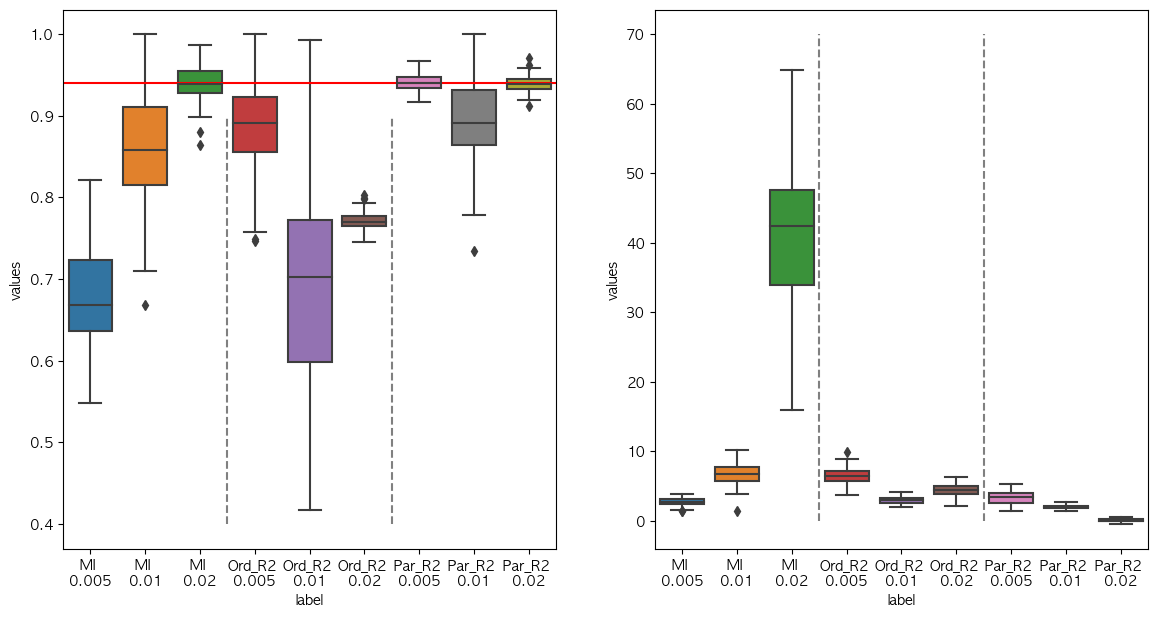

In [98]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize = (14,7))
sns.boxplot(x="label",y="values", data =plot_df,ax=ax[0])
plt.subplot(121)
for i in range(2):
    plt.vlines(3*i+2.5,0.4,0.9,"gray",linestyles="dashed")
plt.hlines(float(result_table.iloc[0,1].strip()[:4]),-0.5,8.5,"red")


plt.subplot(122)
sns.boxplot(x="label",y="values", data =plot_df2,ax=ax[1])
for i in range(2):
    plt.vlines(3*i+2.5,0,70,"gray",linestyles="dashed")

plt.show()

In [73]:
result_table = pd.read_csv("result/simulation_measure_logistics/result_table.csv")

In [74]:
result_table 

,Score,Original,Mutual Information Criterion,Ordinary R2,Partial R2
0,Accuracy,0.75(0.03),0.76(0.02),0.75(0.03),0.71(0.04)
1,Accuracy,0.75(0.04),0.74(0.04),0.75(0.04),0.76(0.02)
2,Accuracy,0.76(0.04),0.74(0.03),0.74(0.04),0.74(0.05)
3,CN,76.99(17.06),5.47(1.46),7.11(3.48),3.21(1.23)
4,CN,78.11(15.4),12.27(7.17),9.48(4.5),4.5(2.38)
5,CN,79.68(14.21),36.89(17.28),11.65(2.73),8.37(9.78)


In [75]:
plot_df = np.array([
np.random.normal(float(result_table.iloc[0,2].strip()[:4]),float(result_table.iloc[0,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1,2].strip()[:4]),float(result_table.iloc[1,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,2].strip()[:4]),float(result_table.iloc[2,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,3].strip()[:4]),float(result_table.iloc[0,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1,3].strip()[:4]),float(result_table.iloc[1,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,3].strip()[:4]),float(result_table.iloc[2,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,4].strip()[:4]),float(result_table.iloc[0,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1,4].strip()[:4]),float(result_table.iloc[1,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,4].strip()[:4]),float(result_table.iloc[2,4].strip()[5:9]),100)])
plot_df_label = np.array(
["MI \n0.005" for i in range(100)] +
["MI \n0.01" for i in range(100)] +
["MI \n0.02" for i in range(100)] +
["Ord_R2 \n0.005" for i in range(100)] + 
["Ord_R2 \n0.01" for i in range(100)] + 
["Ord_R2 \n0.02" for i in range(100)] + 
["Par_R2 \n0.005" for i in range(100)] +
["Par_R2 \n0.01" for i in range(100)] + 
["Par_R2 \n0.02" for i in range(100)])
plot_df = pd.DataFrame([plot_df_label,plot_df.reshape(-1)]).T
plot_df.columns = ["label","values"]

In [87]:
plot_df2 = np.array([
trim_down(np.random.normal(float(result_table.iloc[3,2].strip()[:4]),float(result_table.iloc[3,2].strip()[5:9]),100)),
trim_down(np.random.normal(float(result_table.iloc[4,2].strip()[:4]),float(result_table.iloc[4,2].strip()[6:9]),100)),
trim_down(np.random.normal(float(result_table.iloc[5,2].strip()[:5]),float(result_table.iloc[5,2].strip()[6:10]),100)),
trim_down(np.random.normal(float(result_table.iloc[3,3].strip()[:4]),float(result_table.iloc[3,3].strip()[5:9]),100)),
trim_down(np.random.normal(float(result_table.iloc[4,3].strip()[:4]),float(result_table.iloc[4,3].strip()[5:8]),100)),
trim_down(np.random.normal(float(result_table.iloc[5,3].strip()[:5]),float(result_table.iloc[5,3].strip()[6:10]),100)),
trim_down(np.random.normal(float(result_table.iloc[3,4].strip()[:4]),float(result_table.iloc[3,4].strip()[5:9]),100)),
trim_down(np.random.normal(float(result_table.iloc[4,4].strip()[:3]),float(result_table.iloc[4,4].strip()[4:8]),100)),
trim_down(np.random.normal(float(result_table.iloc[5,4].strip()[:4]),float(result_table.iloc[5,4].strip()[5:9]),100))])
plot_df_label = np.array(
["MI \n0.005" for i in range(100)] +
["MI \n0.01" for i in range(100)] +
["MI \n0.02" for i in range(100)] +
["Ord_R2 \n0.005" for i in range(100)] + 
["Ord_R2 \n0.01" for i in range(100)] + 
["Ord_R2 \n0.02" for i in range(100)] + 
["Par_R2 \n0.005" for i in range(100)] +
["Par_R2 \n0.01" for i in range(100)] + 
["Par_R2 \n0.02" for i in range(100)])
plot_df2 = pd.DataFrame([plot_df_label,plot_df2.reshape(-1)]).T
plot_df2.columns = ["label","values"]

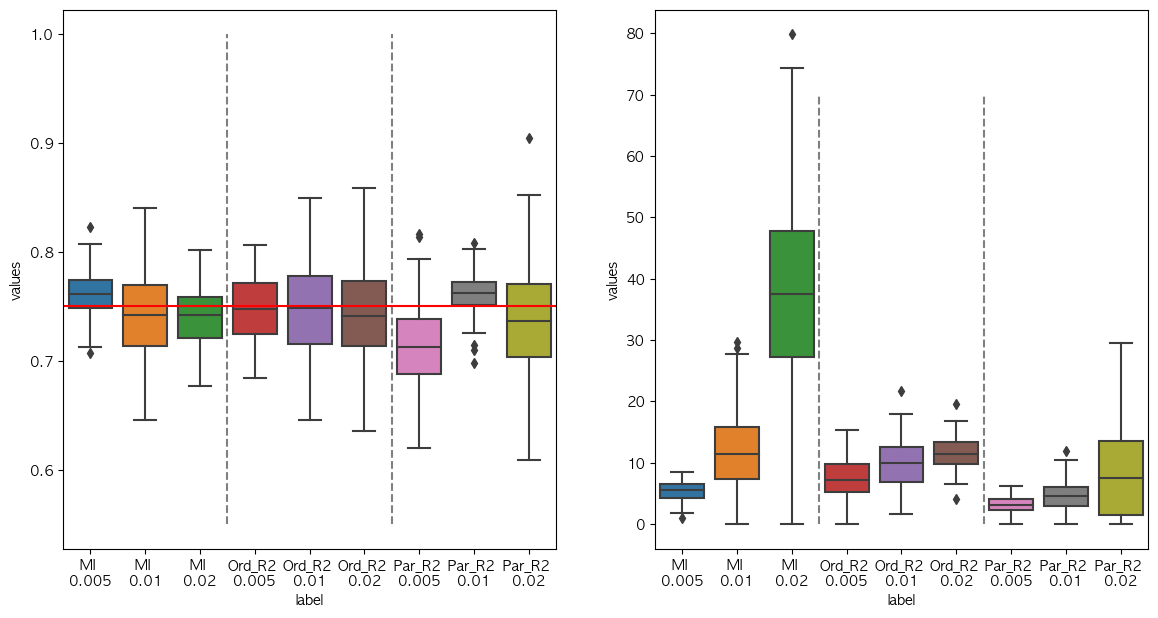

In [88]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize = (14,7))
sns.boxplot(x="label",y="values", data =plot_df,ax=ax[0])
plt.subplot(121)
for i in range(2):
    plt.vlines(3*i+2.5,0.55,1.0,"gray",linestyles="dashed")
plt.hlines(float(result_table.iloc[0,1].strip()[:4]),-0.5,8.5,"red")

plt.subplot(122)
sns.boxplot(x="label",y="values", data =plot_df2,ax=ax[1])
for i in range(2):
    plt.vlines(3*i+2.5,0,70,"gray",linestyles="dashed")

plt.show()

In [10]:
i = 3
plot_df_values = np.array([
np.random.normal(float(result_table.iloc[0+i,2].strip()[:3]),float(result_table.iloc[0+i,2].strip()[4:8]),100),
np.random.normal(float(result_table.iloc[0+i,3].strip()[:3]),float(result_table.iloc[0+i,3].strip()[4:8]),100),
np.random.normal(float(result_table.iloc[0+i,4].strip()[:4]),float(result_table.iloc[0+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,4].strip()[:4]),float(result_table.iloc[1+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,4].strip()[:4]),float(result_table.iloc[2+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,5].strip()[:4]),float(result_table.iloc[0+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,5].strip()[:4]),float(result_table.iloc[1+i,5].strip()[5:8]),100),
np.random.normal(float(result_table.iloc[2+i,5].strip()[:4]),float(result_table.iloc[2+i,5].strip()[5:9]),100)])

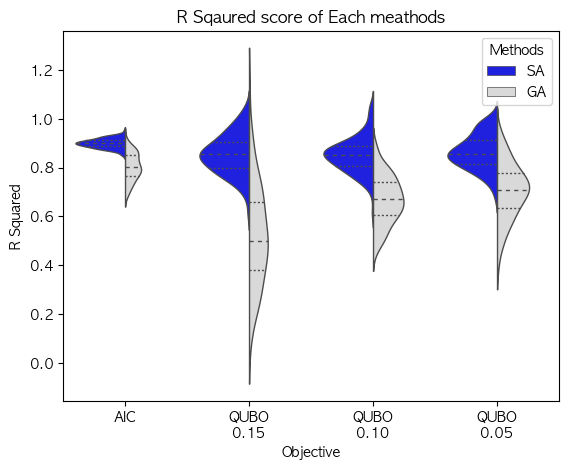

In [11]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","R Squared"]
sns.violinplot(data=plot_df,x="Objective",y="R Squared",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("R Sqaured score of Each meathods")
plt.show()

In [12]:
i = 6
plot_df_values = np.array([
np.random.normal(float(result_table.iloc[0+i,2].strip()[:4]),float(result_table.iloc[0+i,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,3].strip()[:4]),float(result_table.iloc[0+i,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,4].strip()[:4]),float(result_table.iloc[0+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,4].strip()[:4]),float(result_table.iloc[1+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,4].strip()[:4]),float(result_table.iloc[2+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,5].strip()[:4]),float(result_table.iloc[0+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,5].strip()[:4]),float(result_table.iloc[1+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,5].strip()[:4]),float(result_table.iloc[2+i,5].strip()[5:9]),100)])

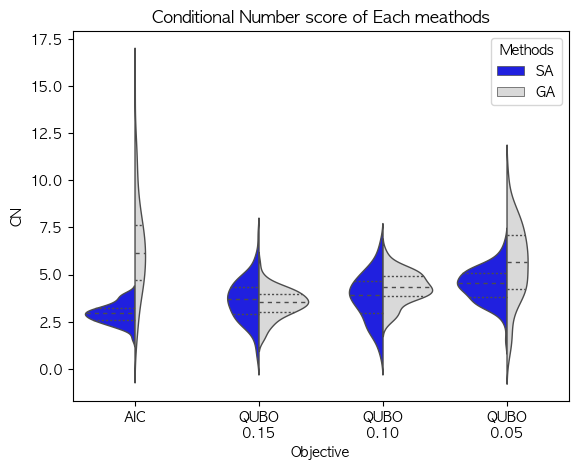

In [13]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","CN"]
sns.violinplot(data=plot_df,x="Objective",y="CN",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("Conditional Number score of Each meathods")
plt.show()

In [14]:
result_table

,,Original,SA_AIC,GA_AIC,SA_QUBO,GA_QUBO
0,R2,0.84(0.02),0.84(0.02),0.77(0.03),0.7(0.06),0.62(0.1)
1,R2,0.86(0.02),0.86(0.02),0.78(0.05),0.77(0.09),0.74(0.08)
2,R2,0.86(0.02),0.86(0.02),0.81(0.05),0.84(0.03),0.79(0.06)
3,R2,0.9(0.02),0.9(0.02),0.8(0.06),0.84(0.09),0.55(0.21)
4,R2,0.91(0.02),0.91(0.02),0.83(0.09),0.86(0.07),0.69(0.1)
5,R2,0.91(0.01),0.91(0.01),0.85(0.04),0.87(0.07),0.71(0.12)
6,CN,27.49(7.13),2.94(0.53),6.25(2.65),3.64(1.07),3.41(0.87)
7,CN,27.97(7.74),3.63(1.0),5.59(1.9),3.85(1.22),4.39(0.78)
8,CN,26.81(5.0),3.81(0.95),7.54(2.53),4.37(0.94),5.47(1.93)
9,CN,37.67(14.47),4.01(0.88),5.34(2.1),3.81(0.93),3.71(1.06)


In [15]:
i = 9
plot_df_values = np.array([
np.random.normal(float(result_table.iloc[0+i,2].strip()[:4]),float(result_table.iloc[0+i,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,3].strip()[:4]),float(result_table.iloc[0+i,3].strip()[5:8]),100),
np.random.normal(float(result_table.iloc[0+i,4].strip()[:4]),float(result_table.iloc[0+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,4].strip()[:4]),float(result_table.iloc[1+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,4].strip()[:4]),float(result_table.iloc[2+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,5].strip()[:4]),float(result_table.iloc[0+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,5].strip()[:4]),float(result_table.iloc[1+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,5].strip()[:4]),float(result_table.iloc[2+i,5].strip()[5:9]),100)])

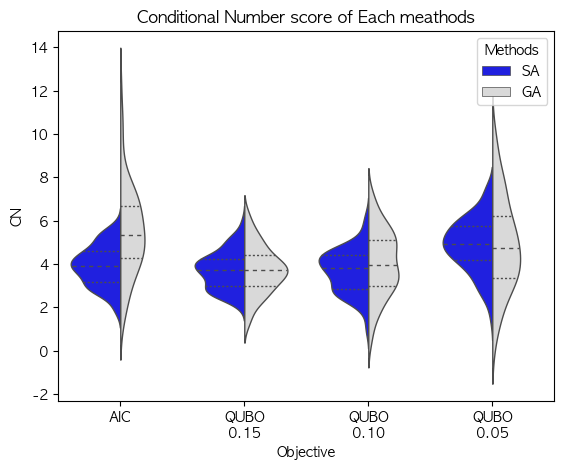

In [16]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","CN"]
sns.violinplot(data=plot_df,x="Objective",y="CN",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("Conditional Number score of Each meathods")
plt.show()

In [12]:
number_influentials =5
number_features = 20
number_samples = 1000
covariance_parameter = 10
epsilon = None
lmbd = 0.05
beta_coef = np.concatenate([np.random.normal(5,2,number_influentials),np.zeros(number_features-number_influentials)])
if epsilon == None :
    epsilon = number_influentials*5/3
else :
    epsilon = epsilon
X,y = bf.generate_dependent_sample(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
lmbd = lmbd


In [13]:
measure_list = ["mi","full","partial"]
score_list = []
for measure in measure_list:
    Q,beta = bf.get_selecting_qubo(X,y,y_type="linear",measure=measure)
    score_list += [[sum(sum(Q)),sum(beta),sum(sum(Q))/sum(beta)]]
score_list = pd.DataFrame(score_list)
score_list.index = measure_list
score_list.columns = ["Q","beta","ratio"]
score_list

,Q,beta,ratio
mi,60.387409,1.806863,33.421124
full,87.641775,1.928082,45.455415
partial,87.641775,3.163949,27.700122


In [14]:
score_list.index = measure_list
score_list.columns = ["Q","beta"]

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [15]:
number_influentials =5
number_features = 20
number_samples = 1000
covariance_parameter = 1
lmbd = 0.05
beta_coef = np.concatenate([np.random.normal(5,2,number_influentials),np.zeros(number_features-number_influentials)])
epsilon=0
X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
y_type="binary"
lmbd = lmbd

<BarContainer object of 20 artists>

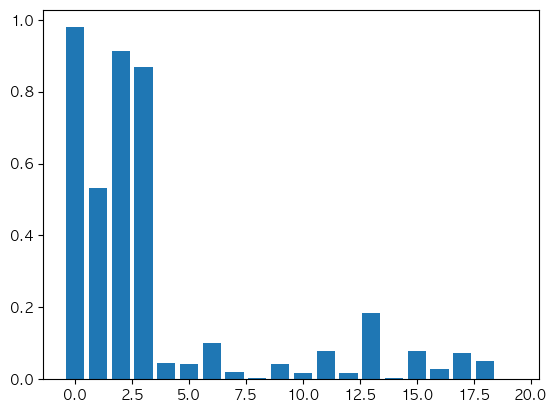

In [16]:
Q,beta = bf.get_selecting_qubo(X,y,y_type = y_type,measure="partial")
plt.bar(x = range(number_features),height = beta)

<BarContainer object of 20 artists>

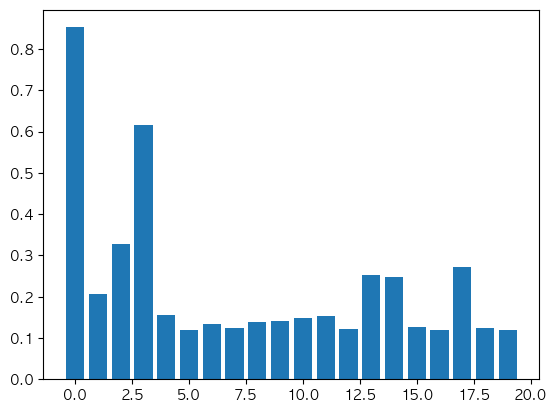

In [17]:
Q,beta = bf.get_selecting_qubo(X,y,y_type = y_type,measure="full")
plt.bar(x = range(number_features),height = beta)

<BarContainer object of 20 artists>

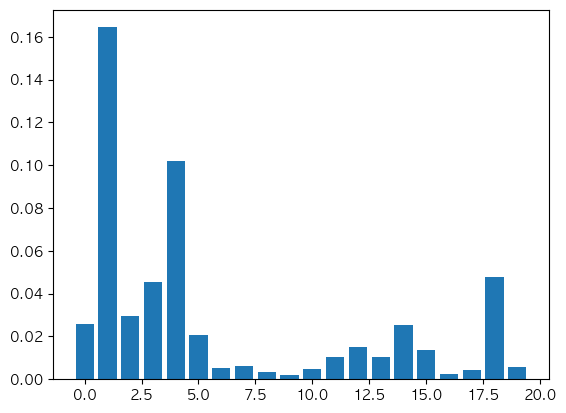

In [18]:
plt.bar(x = range(number_features),height = bf.mutual_information_matrix(X,y))

In [26]:
number_influentials =5
number_features = 20
number_samples = 1000
covariance_parameter = 10
epsilon = None
lmbd = 0.04
beta_coef = np.concatenate([np.random.normal(5,2,number_influentials),np.zeros(number_features-number_influentials)])
if epsilon == None :
    epsilon = number_influentials*5/3
else :
    epsilon = epsilon
X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
lmbd = 0.05
y_type = "binary"

sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10)
sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
sa_full_result = sa_full.optimize(X,y,lmbd,reps=10)
sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10)

X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [30]:
sa_mi_result

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [31]:
sa_full_result

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.])

In [32]:
sa_partial_result

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])